# 1. Which genres have the highest ratings?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
data_path = os.path.join('zippedData')
files = os.listdir(data_path)
file_paths = ['zippedData/' + file for file in files]

In [4]:
print(file_paths)

['zippedData/bom.movie_gross.csv.gz', 'zippedData/imdb.name.basics.csv.gz', 'zippedData/imdb.title.akas.csv.gz', 'zippedData/imdb.title.basics.csv.gz', 'zippedData/imdb.title.crew.csv.gz', 'zippedData/imdb.title.principals.csv.gz', 'zippedData/imdb.title.ratings.csv.gz', 'zippedData/rt.movie_info.tsv.gz', 'zippedData/rt.reviews.tsv.gz', 'zippedData/tmdb.movies.csv.gz', 'zippedData/tn.movie_budgets.csv.gz']


In [5]:
"""Adding files into a DataFrame dictionary so one is able to recognize the file.
The file is the key and the information in the DataFrame is the value"""
df_dict = {}
file_paths = ['zippedData/bom.movie_gross.csv.gz', 'zippedData/imdb.name.basics.csv.gz', 
              'zippedData/imdb.title.akas.csv.gz', 'zippedData/imdb.title.basics.csv.gz', 
              'zippedData/imdb.title.crew.csv.gz', 'zippedData/imdb.title.principals.csv.gz', 
              'zippedData/imdb.title.ratings.csv.gz','zippedData/tmdb.movies.csv.gz', 'zippedData/tn.movie_budgets.csv.gz']
for file in file_paths:
    df_dict[file] = pd.read_csv(file)
rotten_file_paths = ['zippedData/rt.movie_info.tsv.gz', 'zippedData/rt.reviews.tsv.gz']
for file in rotten_file_paths:
    df_dict[file] = pd.read_csv(file, delimiter='\t', encoding='ISO-8859-1')    
print(df_dict)

{'zippedData/bom.movie_gross.csv.gz':                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          

In [6]:
# df_dict['zippedData/rt.movie_info.tsv.gz'].head()
# df_dict['zippedData/imdb.name.basics.csv.gz'].head()
# df_dict['zippedData/imdb.title.akas.csv.gz'].head()
# df_dict['zippedData/imdb.title.crew.csv.gz'].head()
# df_dict['zippedData/imdb.title.principals.csv.gz'].head()

In [7]:
"""Renaming the DataFrame genre"""
genre = df_dict['zippedData/imdb.title.basics.csv.gz']
genre.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
"""Renaming the DataFrame rating"""
rating = df_dict['zippedData/imdb.title.ratings.csv.gz']
rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
"""Merging the DataFrames genre and rating into a DataFrame called ratings"""
ratings = pd.merge(genre, rating, on = 'tconst')
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
"""Showing that the merge into ratings contains all the columns from the genre and rating DataFrame"""
ratings.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [11]:
"""Drop the NaN values within the genres and averagerating columns"""
ratings = ratings.dropna(subset = ['genres', 'averagerating'])
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
# """Check for duplicates within the tconst column"""
# ratings.duplicated(subset = ['tconst'], keep = False)

In [13]:
"""Finding the mean rating of the average rating of each movie within the genres column"""
ratings.groupby(['genres'])['averagerating'].mean().sort_values(ascending = False).head()

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Game-Show                     9.0
Music,Mystery                 9.0
Name: averagerating, dtype: float64

In [14]:
"""Viewing the ratings DataFrame for reference before seperating genres within the genres column"""
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
"""Isolating each genre"""
ratings[ratings['genres'].str.contains("Action")]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
22,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,"Action,Drama",7.4,5
31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
49,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action,6.4,16
...,...,...,...,...,...,...,...,...
73761,tt9838780,Hidden Dragon Battle,Hidden Dragon Battle,2017,NaN,Action,8.8,57
73762,tt9839040,Murphy's Law: Ghanoone Morfi,Murphy's Law: Ghanoone Morfi,2019,90.0,"Action,Comedy",4.9,51
73764,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",7.5,24
73775,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14


In [16]:
"""Isolating the action genre and finding it's corresponding mean rating from the average ratings column"""
ratings[ratings['genres'].str.contains("Action")]['averagerating'].mean()

5.810360618202613

In [17]:
"""Isolating the unique genres within the ratings DataFrame"""
ratings['genres'].unique()
"""Realizing the unique method turned ratings['genres'] from a DataFrame Series to an array"""

"Realizing the unique method turned ratings['genres'] from a DataFrame Series to an array"

In [18]:
"""Checking the type"""
type(ratings['genres'].unique())

numpy.ndarray

In [19]:
"""Changing the np array to a string"""
str(ratings['genres'].unique())

"['Action,Crime,Drama' 'Biography,Drama' 'Drama' 'Comedy,Drama'\n 'Comedy,Drama,Fantasy' 'Horror,Thriller' 'Adventure,Animation,Comedy'\n 'History' 'Documentary' 'Animation,Drama,History' 'Drama,Mystery'\n 'Action,Animation,Comedy' 'Crime,Drama' 'Biography,Comedy,Drama'\n 'Action,Drama' 'Documentary,History' 'Sci-Fi' 'Comedy' 'Thriller'\n 'Adventure,Animation,Sci-Fi' 'Drama,Horror' 'Drama,Mystery,Thriller'\n 'Drama,Family' 'Adventure,Comedy,Romance' 'Adventure,Drama,Romance'\n 'Comedy,Crime,Drama' 'Biography' 'Horror' 'Adventure,Comedy,Drama'\n 'Drama,Sci-Fi,Thriller' 'Action' 'Comedy,Drama,Romance'\n 'Action,Adventure,Sci-Fi' 'Comedy,Family' 'Adventure' 'Drama,History,War'\n 'Action,Thriller' 'Comedy,Crime' 'Crime,Drama,Thriller'\n 'Action,Sci-Fi,Thriller' 'Fantasy' 'Drama,Mystery,Sci-Fi'\n 'Biography,Drama,History' 'Action,Comedy,Crime'\n 'Action,Adventure,Thriller' 'Horror,Mystery,Thriller'\n 'Action,Drama,Family' 'Comedy,Drama,Music' 'Drama,Fantasy,Horror'\n 'Drama,Romance,Sci-Fi' 

In [20]:
"""Cleaning the previous list"""
clean = str(ratings['genres'].unique()).replace("[","").replace("]","").replace("\n", "").replace("'", "").replace(" ", ",").split(",")
print(clean)

['Action', 'Crime', 'Drama', 'Biography', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'History', 'Documentary', 'Animation', 'Drama', 'History', 'Drama', 'Mystery', 'Action', 'Animation', 'Comedy', 'Crime', 'Drama', 'Biography', 'Comedy', 'Drama', 'Action', 'Drama', 'Documentary', 'History', 'Sci-Fi', 'Comedy', 'Thriller', 'Adventure', 'Animation', 'Sci-Fi', 'Drama', 'Horror', 'Drama', 'Mystery', 'Thriller', 'Drama', 'Family', 'Adventure', 'Comedy', 'Romance', 'Adventure', 'Drama', 'Romance', 'Comedy', 'Crime', 'Drama', 'Biography', 'Horror', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Sci-Fi', 'Thriller', 'Action', 'Comedy', 'Drama', 'Romance', 'Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Family', 'Adventure', 'Drama', 'History', 'War', 'Action', 'Thriller', 'Comedy', 'Crime', 'Crime', 'Drama', 'Thriller', 'Action', 'Sci-Fi', 'Thriller', 'Fantasy', 'Drama', 'Mystery', 'Sci-Fi', 'Biography', 'Drama', 'History

In [21]:
"""No duplicates in the set method"""
clean_set_genres = set(clean)
print(clean_set_genres)

{'Drama', 'Sport', 'Reality-TV', 'History', 'Biography', 'Thriller', 'Animation', 'News', 'Sci-Fi', 'Western', 'Music', 'War', 'Horror', 'Adult', 'Action', 'Short', 'Game-Show', 'Fantasy', 'Adventure', 'Musical', 'Romance', 'Crime', 'Documentary', 'Comedy', 'Mystery', 'Family'}


In [22]:
"""Alphabetize the set so the bar graph will be easier to follow"""
clean_set_genres = sorted(clean_set_genres)

In [23]:
"""Placing all the genres (key) and their mean averageratings (value) into a dictionary"""
genre_rating_dict = {}
for genre in clean_set_genres:
    genre_rating_dict[genre] = ratings[ratings['genres'].str.contains(genre)]['averagerating'].mean()
print(genre_rating_dict)

{'Action': 5.810360618202613, 'Adult': 3.766666666666667, 'Adventure': 6.196201205134906, 'Animation': 6.248307515777409, 'Biography': 7.162273562614873, 'Comedy': 6.002689415847302, 'Crime': 6.115441335935799, 'Documentary': 7.332090350926571, 'Drama': 6.401559048980236, 'Family': 6.394724501758511, 'Fantasy': 5.919473189087487, 'Game-Show': 7.3, 'History': 7.040955752212392, 'Horror': 5.00344018764659, 'Music': 6.930521936459925, 'Musical': 6.498335644937577, 'Mystery': 5.920401447844683, 'News': 7.2713298791018985, 'Reality-TV': 6.499999999999999, 'Romance': 6.146607983001951, 'Sci-Fi': 5.4897552130552985, 'Short': 8.8, 'Sport': 6.961492790500417, 'Thriller': 5.639114031885117, 'War': 6.584290738569757, 'Western': 5.868214285714282}


In [24]:
"""Retrieving the length of the dictionary to determine xtick labels and colors for the bar plot"""
len(genre_rating_dict)

26

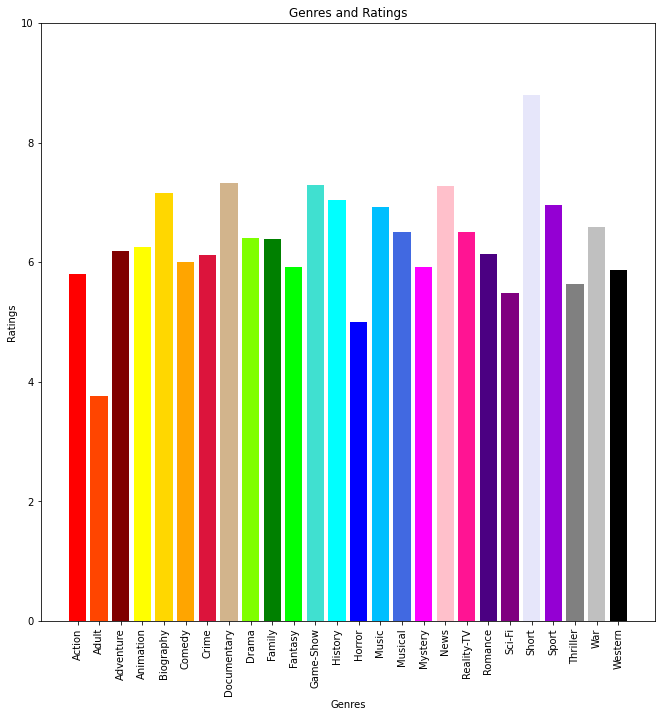

In [25]:
fig, ax = plt.subplots(figsize = (11,11))
x = genre_rating_dict.keys()
y = genre_rating_dict.values()
color = ["red", "orangered", "maroon", "yellow", "gold", "orange", "crimson", "tan", "chartreuse", "green", "lime", 
         "turquoise", "cyan", "blue", "deepskyblue", "royalblue", "fuchsia", "pink", "deeppink", "indigo", "purple", 
         "lavender", "darkviolet", "grey", "silver", "black"]
plt.bar(x, y, color = color)

ax.set_title('Genres and Ratings');
ax.set_xlabel('Genres')
ax.set_ylabel('Ratings')
ax.set_ylim(0, 10)
ax.set_xticklabels(sorted(['Animation','History', 'Biography', 'Adult', 'Family', 'Sport', 'Musical', 'Mystery', 'Action', 
                    'Adventure', 'Crime', 'Comedy', 'News', 'Thriller', 'War', 'Documentary', 'Reality-TV', 'Horror', 
                    'Sci-Fi', 'Drama', 'Music', 'Romance', 'Western', 'Fantasy', 'Game-Show', 'Short']), rotation = 'vertical')

plt.savefig('genres1')

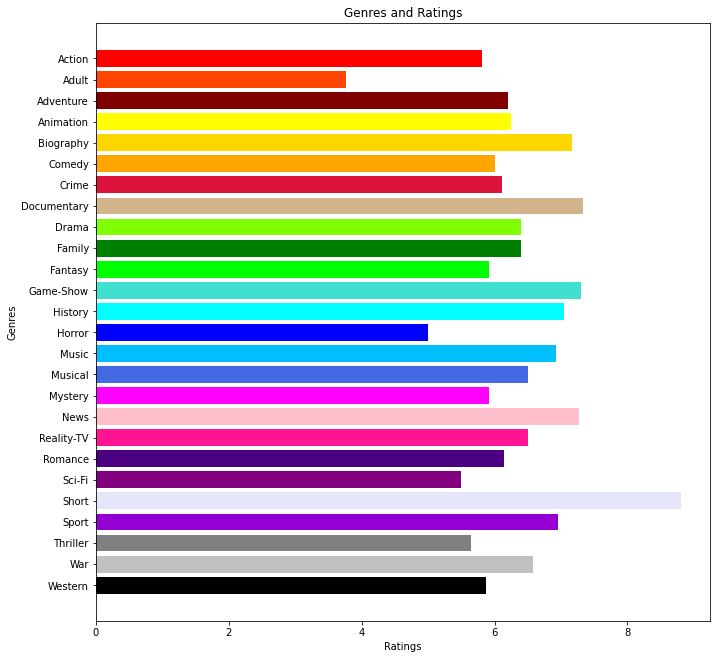

In [26]:
fig, ax = plt.subplots(figsize = (11,11))
x = list(genre_rating_dict.keys())
y = list(genre_rating_dict.values())
color = ["red", "orangered", "maroon", "yellow", "gold", "orange", "crimson", "tan", "chartreuse", "green", "lime", 
         "turquoise", "cyan", "blue", "deepskyblue", "royalblue", "fuchsia", "pink", "deeppink", "indigo", "purple", 
         "lavender", "darkviolet", "grey", "silver", "black"]
ax.set_title('Genres and Ratings');
ax.set_xlabel('Ratings')
ax.set_ylabel('Genres')

plt.barh(x, y, color = color)
ax.invert_yaxis()
plt.show()

In [27]:
"""Converting the genre_rating_dict into a DataFrame"""
genre_rating_df = pd.DataFrame(list(genre_rating_dict.items()), columns = ['genres', 'averagerating'])
genre_rating_df.head(26)

,genres,averagerating
0,Action,5.810361
1,Adult,3.766667
2,Adventure,6.196201
3,Animation,6.248308
4,Biography,7.162274
5,Comedy,6.002689
6,Crime,6.115441
7,Documentary,7.332090
8,Drama,6.401559
9,Family,6.394725


In [28]:
genre_rating_df.describe()

,averagerating
count,26.000000
mean,6.357856
std,0.928340
min,3.766667
25%,5.919705
50%,6.321516
75%,6.953750
max,8.800000


The average overall rating is a 6.35. 
The top 25% movies will have a rating over 6.9 while the lowest 25% of movies will have a rating below 5.9. 
The highest rated genre has an mean rating of 8.8 while the lowest rated genre has a mean rating of 3.7.

In [29]:
genre_rating_df.groupby(['genres'])['averagerating'].mean().sort_values(ascending = False)

genres
Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
History        7.040956
Sport          6.961493
Music          6.930522
War            6.584291
Reality-TV     6.500000
Musical        6.498336
Drama          6.401559
Family         6.394725
Animation      6.248308
Adventure      6.196201
Romance        6.146608
Crime          6.115441
Comedy         6.002689
Mystery        5.920401
Fantasy        5.919473
Western        5.868214
Action         5.810361
Thriller       5.639114
Sci-Fi         5.489755
Horror         5.003440
Adult          3.766667
Name: averagerating, dtype: float64

The isolated genre 'short' has the highest rating while the isolated genre 'adult' has the lowest rating.
Music, Sport, History, Biography, Game-Show, Documentary, and Short movies have the highest ratings.
Western, Action, Thriller, Sci-Fi, Horror, and Adult have the lowest ratings.